In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

# Exploratory Data Analysis 

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.shape


(614, 13)

In [5]:
test.shape

(367, 12)

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Univariate Analysis

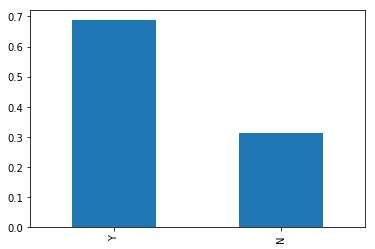

In [10]:
train["Loan_Status"].value_counts(normalize=True).plot.bar()

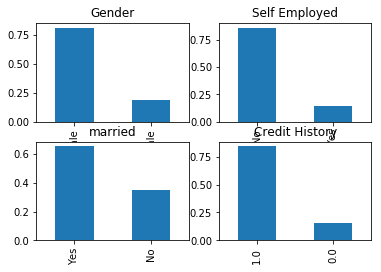

In [11]:
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(title="Gender")
plt.subplot(222)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self Employed")
plt.subplot(223)
train["Married"].value_counts(normalize=True).plot.bar(title="married")
plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit History")

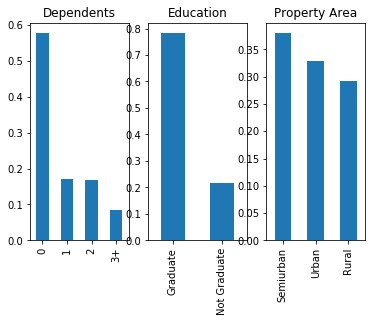

In [12]:
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(title="Dependents")
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property Area")


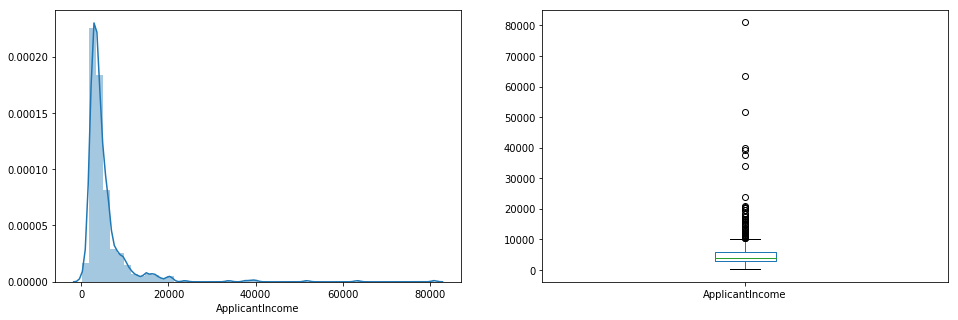

In [13]:
plt.subplot(121)
sn.distplot(train["ApplicantIncome"])
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))

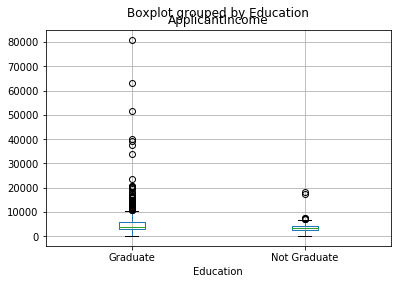

In [14]:
train.boxplot(column="ApplicantIncome",by="Education")

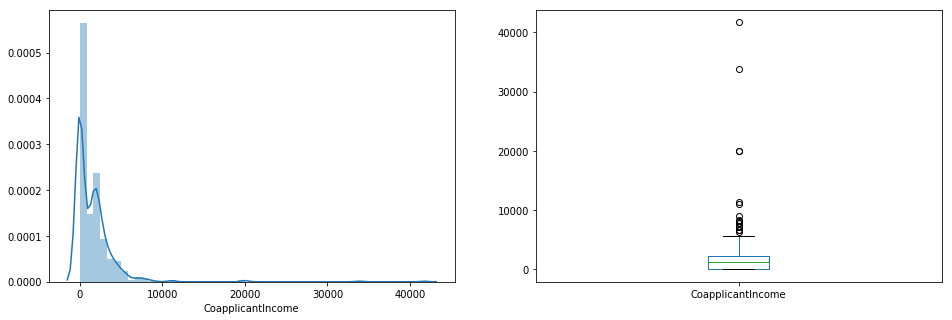

In [16]:
plt.subplot(121)
sn.distplot(train["CoapplicantIncome"])
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))

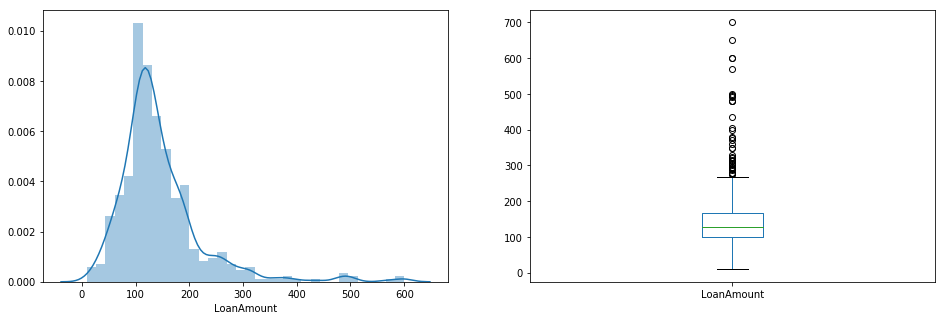

In [17]:
plt.subplot(121)
df=train.dropna()
sn.distplot(df["LoanAmount"])
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5))

## Bivariate Analysis

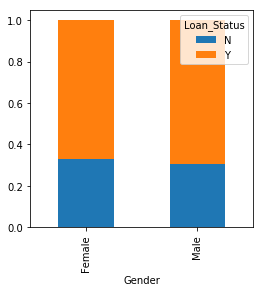

In [18]:
gender=pd.crosstab(train["Gender"],train["Loan_Status"])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

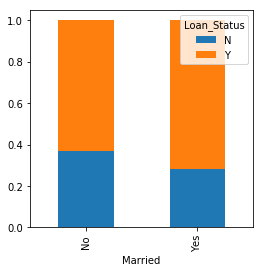

In [19]:
married=pd.crosstab(train["Married"],train["Loan_Status"])
married.div(married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

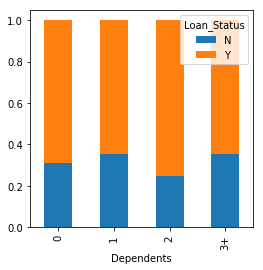

In [20]:
dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

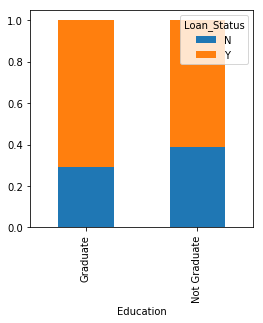

In [21]:
education=pd.crosstab(train["Education"],train["Loan_Status"])
education.div(education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

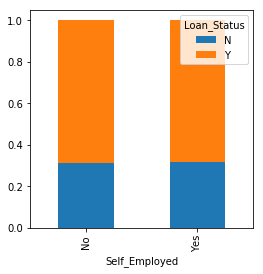

In [22]:
se=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
se.div(se.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

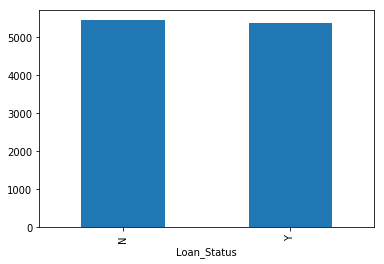

In [23]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

In [24]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very High"]
train["Income_bin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)

Text(0, 0.5, 'Percentage')

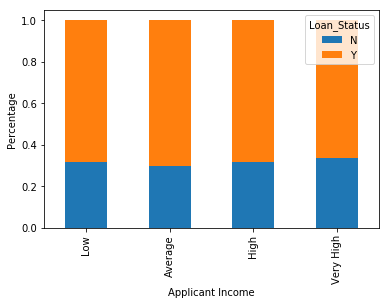

In [25]:
income_bin=pd.crosstab(train["Income_bin"],train["Loan_Status"])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Applicant Income")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

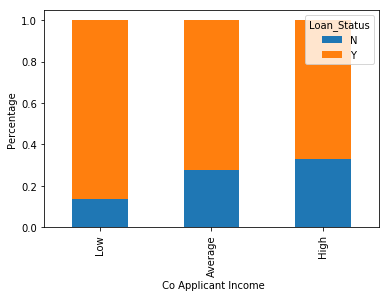

In [26]:
bins=[0,1000,3000,42000]
group=["Low","Average","High"]
train["coIncome_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group)
income_bin=pd.crosstab(train["coIncome_bin"],train["Loan_Status"])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel(" Co Applicant Income")
plt.ylabel("Percentage")

In [27]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [28]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very High"]
train["Total_Income_bin"]=pd.cut(train["Total_Income"],bins,labels=group)

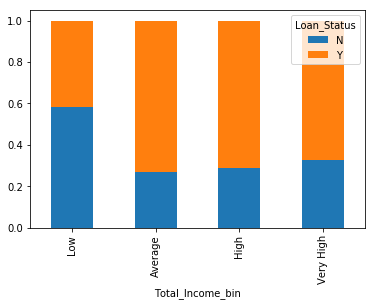

In [29]:
totalincome=pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])
totalincome.div(totalincome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

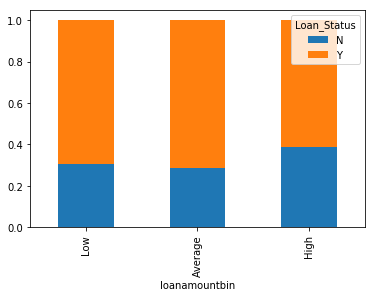

In [30]:
bins=[0,100,200,700]
group=["Low","Average","High"]
train["loanamountbin"]=pd.cut(train["LoanAmount"],bins,labels=group)
loanamount=pd.crosstab(train["loanamountbin"],train["Loan_Status"])
loanamount.div(loanamount.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [31]:
train=train.drop(["loanamountbin","Total_Income_bin","Total_Income","Income_bin","coIncome_bin"],axis=1)

In [32]:
train["Dependents"].replace('3+','3',inplace=True)
test["Dependents"].replace('3+','3',inplace=True)
train["Loan_Status"].replace('N',0,inplace=True)
train["Loan_Status"].replace('Y',1,inplace=True)

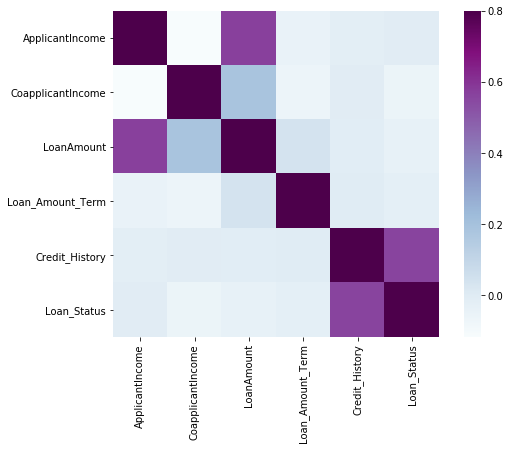

In [33]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sn.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

# Missing Values and Outlier treatment

In [34]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train["Gender"].fillna(train['Gender'].mode()[0],inplace=True)
train["Married"].fillna(train['Married'].mode()[0],inplace=True)
train["Dependents"].fillna(train['Dependents'].mode()[0],inplace=True)
train["Self_Employed"].fillna(train['Self_Employed'].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [36]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [38]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
test["Gender"].fillna(test['Gender'].mode()[0],inplace=True)
test["Married"].fillna(test['Married'].mode()[0],inplace=True)
test["Dependents"].fillna(test['Dependents'].mode()[0],inplace=True)
test["Self_Employed"].fillna(test['Self_Employed'].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

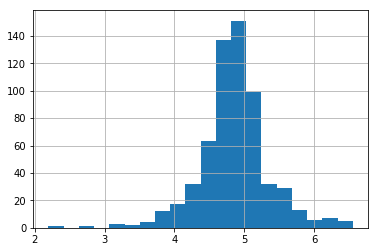

In [41]:
train["Loan_Amount_log"]=np.log(train["LoanAmount"])
train["Loan_Amount_log"].hist(bins=20)
test["Loan_Amount_log"]=np.log(train["LoanAmount"])

# Model Building

In [42]:
train=train.drop("Loan_ID", axis=1)
test=test.drop("Loan_ID", axis=1)

In [43]:
x=train.drop("Loan_Status",1)
y=train.Loan_Status

In [44]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3, random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
pred_cv=model.predict(x_cv)

In [49]:
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [50]:
pred_test = model.predict(test)

In [51]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [52]:
submission['Loan_Status']=pred_test

In [53]:
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

The score generated here is 0.7847.Now usingK cross validation to find how robust our program is .

# Stratified K-Cross validation

In [54]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [55]:
from sklearn.model_selection import StratifiedKFold

In [58]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits)) 
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy score",score)
    i=i+1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]
    


1 of kfold5
accuracy score 0.7983870967741935

2 of kfold5
accuracy score 0.8306451612903226

3 of kfold5
accuracy score 0.8114754098360656

4 of kfold5
accuracy score 0.7950819672131147

5 of kfold5
accuracy score 0.8278688524590164


#  Visualizing the ROC (Reciever Operating Characterstic) Curve

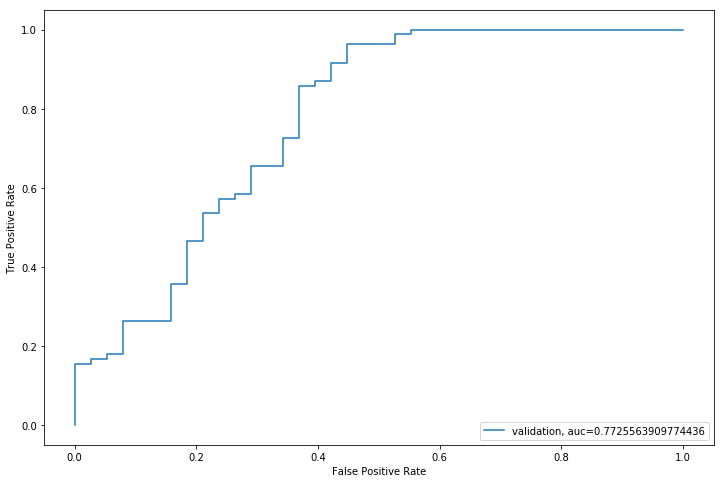

In [59]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()

In [60]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [61]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [62]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

The score generation after AUC score also was 0.7708.

In [63]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

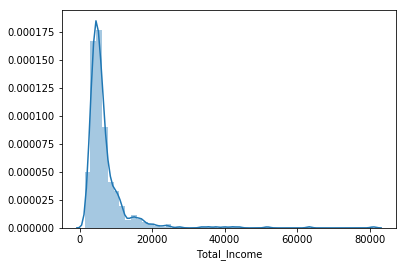

In [64]:
sn.distplot(train["Total_Income"])

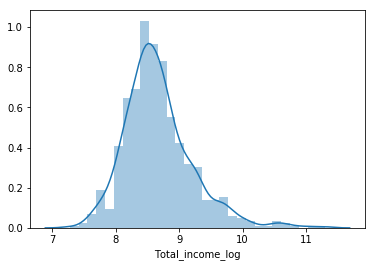

In [65]:
train["Total_income_log"]=np.log(train["Total_Income"])
test["Total_income_log"]=np.log(test["Total_Income"])
sn.distplot(train["Total_income_log"])

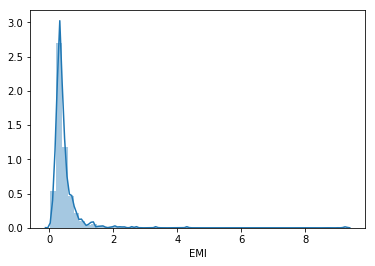

In [66]:
train["EMI"]=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sn.distplot(train["EMI"])

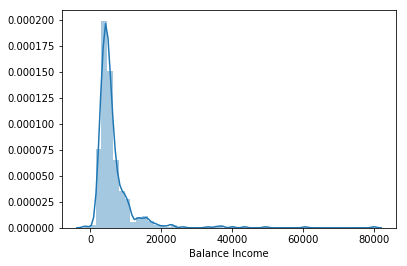

In [67]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sn.distplot(train['Balance Income']);

In [68]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Logistic Regression Model Part-2

In [69]:
X = train.drop('Loan_Status',axis=1) 
y = train.Loan_Status 

In [70]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [71]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.819672131147541


In [72]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [73]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [74]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

The score generated after adding taking EMI,Balance Amount and Total Income into consideration, the score didnt change.So now we are gonna try Decision Tree Classifier.

# Decision Tree 

In [75]:
from sklearn import tree

In [76]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7016129032258065

2 of kfold 5
accuracy_score 0.7580645161290323

3 of kfold 5
accuracy_score 0.7213114754098361

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7213114754098361


In [77]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [78]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [79]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

We got an accuracy score of 0.6111. SInce this is less as compared to logistic regression,so we are gonna try Random Forest

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7580645161290323

2 of kfold 5
accuracy_score 0.7903225806451613

3 of kfold 5
accuracy_score 0.7540983606557377

4 of kfold 5
accuracy_score 0.7377049180327869

5 of kfold 5
accuracy_score 0.8360655737704918


In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [84]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [85]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [86]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [88]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=21)   
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7950819672131147

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8114754098360656


In [89]:
submission['Loan_Status']=pred_test   
submission['Loan_ID']=test_original['Loan_ID']

In [90]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [91]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

The score obtained from this model was 0.7569. Now  we will check feature importance

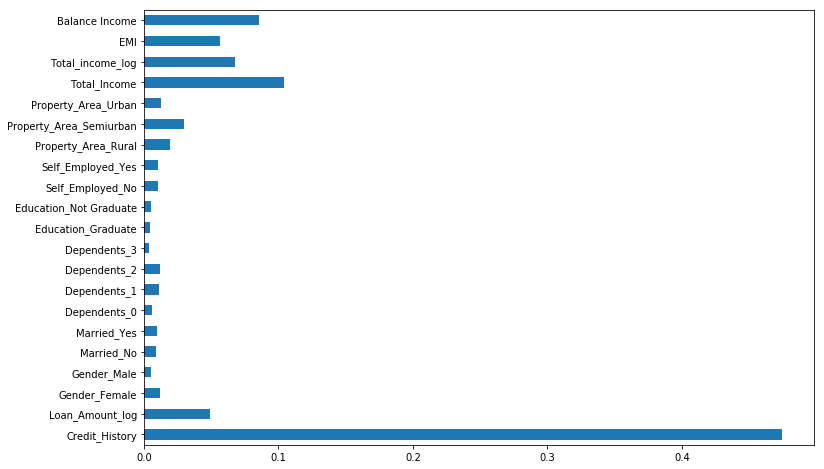

In [92]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# XG Boost


In [93]:
from xgboost import XGBClassifier

In [94]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7459016393442623

5 of kfold 5
accuracy_score 0.7868852459016393


In [95]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [96]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [97]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

The score obtained from this model is 0.7222222222222222.

In [98]:
summary=pd.read_csv("book1.csv")

In [100]:
summary.head()

,Model,Validation Score,Leaderboard Score
0,Logistic Regression,0.832432,0.7847
1,Decision Tree,0.716526,0.6111
2,Random Forest,0.775251,0.7569
3,XG Boost,0.779984,0.7222


Text(0.5, 0, 'Different Models')

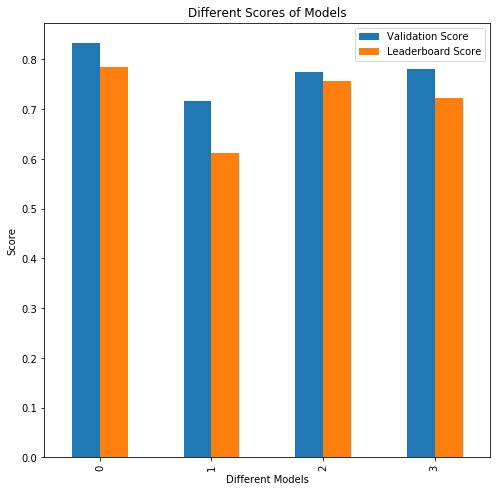

In [118]:
names=["Logistic Regression","Decision Tree","Random Forest","XG Boost"]
summary.plot.bar(figsize=(8,8))
plt.ylabel("Score")
plt.title("Different Scores of Models")
plt.xlabel("Different Models")